'''


    @Author: Shivraj Yelave
    @Date: 28-09-24
    @Last modified by: Shivraj Yelave
    @Last modified time: 
    @Title: Simple Linear Regression


'''


### Import Libraries


In [46]:
import numpy as np
import pandas as pd
import statistics as st
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load Dataset

In [47]:
df = pd.read_csv('Salary_Data.csv')
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Analysing Dataset

In [10]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


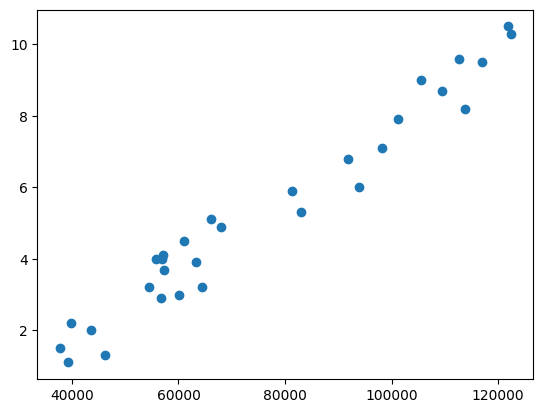

In [16]:
plt.scatter(df['Salary'],df['YearsExperience'])

<Axes: ylabel='Salary'>

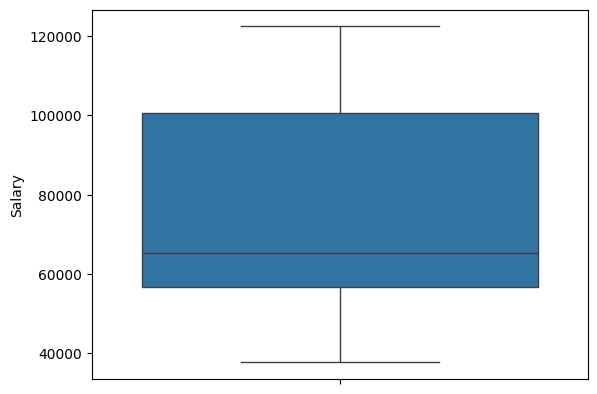

In [20]:
sns.boxplot(df['Salary'])

## Scaling dataset

### Model without scaling dataset

In [48]:
X = df.drop(('Salary'),axis=1)
y = df['Salary']

In [49]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 49830096.85590839
R-squared: 0.9024461774180497


In [50]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [51]:
y_pred = model.predict([[3]])
y_pred

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53593.02898087])

### Model with Scaling

### Scaling using Standard Scaler

In [52]:
scaler = StandardScaler()

scaled_salary = scaler.fit_transform(df[['Salary']])
scaled_salary

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

In [56]:
# Create a new DataFrame with 'YearsExperience' and 'Scaled_Salary'
scaled_df = pd.DataFrame({
    'YearsExperience': df['YearsExperience'],
    'Scaled_Salary': scaled_salary.flatten()  # Flattening scaled_salary to convert it into a 1D array
})

# Check the new DataFrame
scaled_df.head()


,YearsExperience,Scaled_Salary
0,1.1,-1.360113
1,1.3,-1.105527
2,1.5,-1.419919
3,2.0,-1.204957
4,2.2,-1.339781


### Spliting Dataset

In [63]:
X = scaled_df.drop('Scaled_Salary',axis=1)
y = scaled_df['Scaled_Salary']


# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
print(y_train)

28    1.721028
24    1.240203
12   -0.706620
0    -1.360113
4    -1.339781
16   -0.370043
5    -0.718307
13   -0.702020
11   -0.749769
22    0.938611
1    -1.105527
2    -1.419919
25    1.097402
3    -1.204957
21    0.826233
26    1.519868
18    0.198860
29    1.701773
20    0.583780
7    -0.799817
10   -0.474333
14   -0.552504
19    0.665476
6    -0.588158
Name: Scaled_Salary, dtype: float64


### Model Selection

In [65]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)


LinearRegression()

### Make predictions on the test data


In [80]:
y_pred = model.predict(X_test)

### Model Evalutation

In [67]:

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

# Output the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0685893289650704
R-squared: 0.9024461774180498


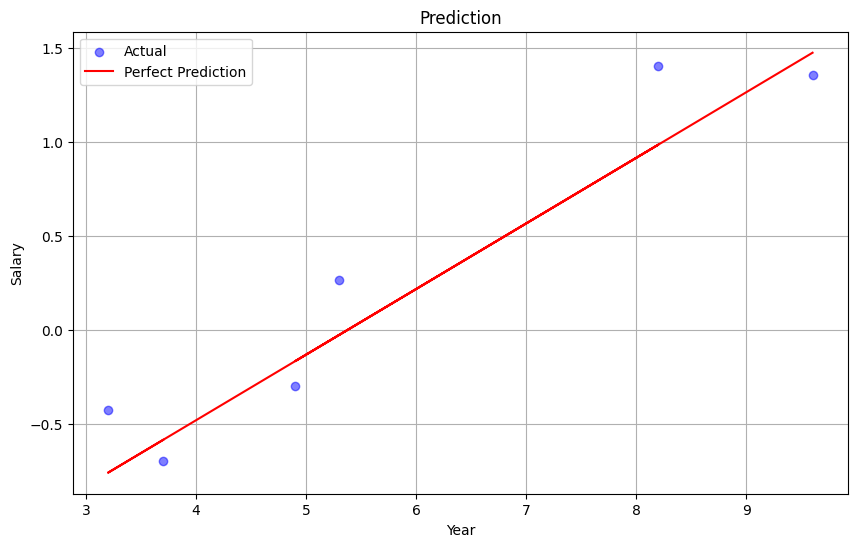

In [83]:

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')

# Plot the line of best fit
plt.plot(X_test,y_pred, color='red',label='Perfect Prediction')

# Add labels and title
plt.title('Prediction')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
X_test

,YearsExperience
27,9.6
15,4.9
23,8.2
17,5.3
8,3.2
9,3.7


In [78]:
y_pred = model.predict([[1.5]])
actual_salary = scaler.inverse_transform(y_pred.reshape(-1,1))
actual_salary

c:\Users\Admin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[39457.30599632]])

In [77]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
